In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
tf.random.set_seed(2382)

2023-11-07 11:46:37.494156: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-07 11:46:37.501091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-07 11:46:37.599862: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-07 11:46:37.599930: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-07 11:46:37.599976: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# 0. Load the data

In [2]:
(Xtrain, ytrain),(Xtest, ytest) = mnist.load_data()

In [3]:
Xtrain[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

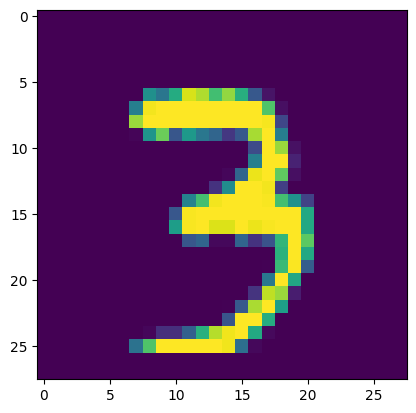

In [4]:
plt.imshow(Xtrain[2917])

# 1. Image normalization, output encoding

In [5]:
Xtrain = Xtrain / 255.0
Xtest = Xtest / 255.0

ytrain_ohe = tf.keras.utils.to_categorical(ytrain)
ytest_ohe = tf.keras.utils.to_categorical(ytest)

# 2. Neural network model

In [6]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(units=44, activation='relu'),
    Dense(units=10, activation='softmax') ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 44)                34540     
                                                                 
 dense_1 (Dense)             (None, 10)                450       
                                                                 
Total params: 34990 (136.68 KB)
Trainable params: 34990 (136.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 3. Train the model

In [8]:
history = model.fit(Xtrain, ytrain_ohe, 
                    batch_size=128,
                    epochs=10,
                    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 9ms/step - loss: 0.5159 - accuracy: 0.8649 - val_loss: 0.2788 - val_accuracy: 0.9228
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2605 - accuracy: 0.9269 - val_loss: 0.2218 - val_accuracy: 0.9381
Epoch 3/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2113 - accuracy: 0.9402 - val_loss: 0.1934 - val_accuracy: 0.9465
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1791 - accuracy: 0.9489 - val_loss: 0.1743 - val_accuracy: 0.9507
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1558 - accuracy: 0.9556 - val_loss: 0.1596 - val_accuracy: 0.9553
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1374 - accuracy: 0.9600 - val_loss: 0.1452 - val_accuracy: 0.9583
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1228 - accuracy: 0.9639 - val_loss: 0.1443 - val_accuracy: 0.9592
Epoch 

### Evolution of the model during training

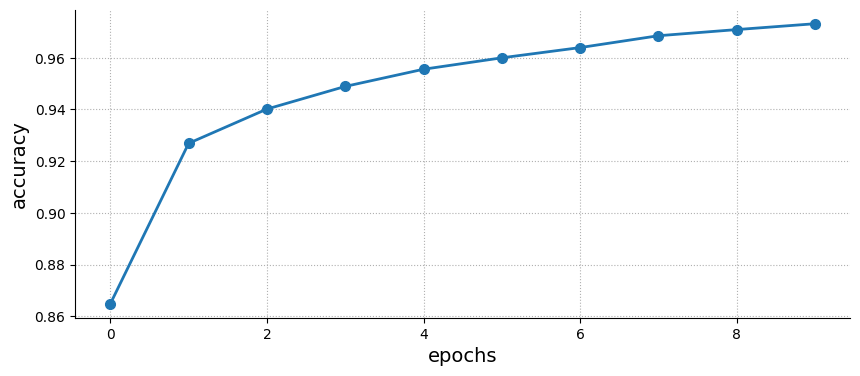

In [13]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(history.history['accuracy'],'.-',linewidth=2,markersize=14)
ax.grid(linestyle=':')
ax.set_xlabel('epochs',fontsize=14)
ax.set_ylabel('accuracy',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 4. Evaluate on the test data

In [14]:
model.evaluate(x=Xtest, y=ytest_ohe)

313/313 [==============================] - 1s 2ms/step - loss: 0.1196 - accuracy: 0.9644


[0.11956986039876938, 0.9643999934196472]